<a href="https://colab.research.google.com/github/undertaker129/yolov10/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

yolov8 image detect code

mv: cannot stat '1.jpg': No such file or directory
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/content/1.jpg: 512x640 19 persons, 5 chairs, 2 dining tables, 40.3ms
Speed: 13.5ms preprocess, 40.3ms inference, 364.5ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict


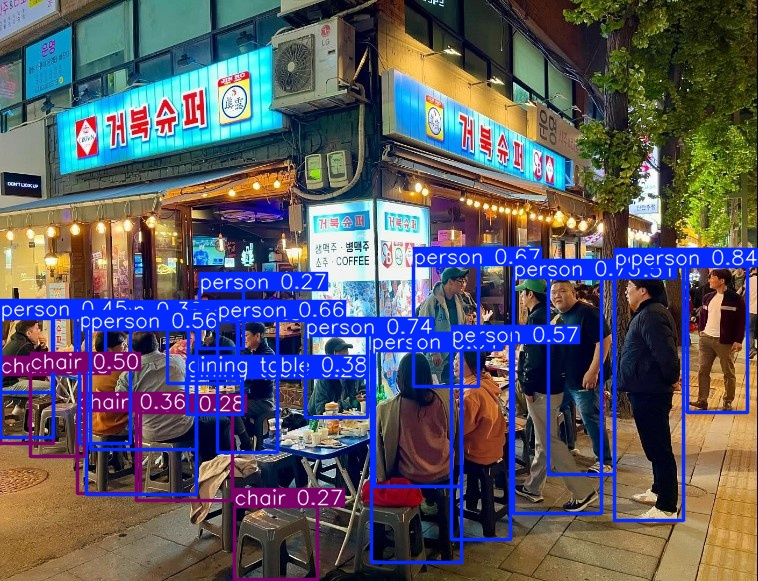

In [2]:
# 1. YOLOv8 설치
!pip install ultralytics --quiet

# 2. yolov8n.pt 다운로드
import urllib.request
urllib.request.urlretrieve("https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt", "yolov8n.pt")

# 3. content 디렉토리 생성 및 이미지 이동 (사용자가 수동으로 업로드한 것으로 가정)
import os
os.makedirs("content", exist_ok=True)

# 4. yolov8n.pt와 1.jpg를 content로 이동 (Colab 환경 기준, 이미 업로드했다고 가정)
!mv yolov8n.pt content/yolov8n.pt
# 주의: 1.jpg는 Colab 왼쪽 사이드바에서 수동 업로드해야 함
# 업로드 후 아래 명령 실행
!mv 1.jpg content/1.jpg

# 5. YOLOv8 객체 감지 수행
from ultralytics import YOLO

model = YOLO('content/yolov8n.pt')
results = model('content/1.jpg', save=True, save_txt=False, save_crop=False)

# 결과 이미지 경로 얻기
import glob
result_img_path = glob.glob('runs/detect/predict/*.jpg')[0]

# 6. output.jpg로 저장
import shutil
shutil.copy(result_img_path, 'output.jpg')

# 7. Colab에서 이미지 출력
from IPython.display import Image, display
display(Image('output.jpg'))


In [ ]:
# 1. YOLOv8 설치
!pip install ultralytics --quiet

# 2. yolov8n.pt 다운로드
import urllib.request
urllib.request.urlretrieve("https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt", "yolov8n.pt")

# 3. content 폴더 생성
import os
os.makedirs("content", exist_ok=True)

# 4. yolov8n.pt 이동
!mv yolov8n.pt content/yolov8n.pt

# 5. 동영상 업로드 (Colab 왼쪽 메뉴에서 video.mp4 수동 업로드)
# 업로드 후 아래 명령 실행
!mv video.mp4 content/video.mp4

# 6. YOLOv8으로 동영상 감지
from ultralytics import YOLO

model = YOLO("content/yolov8n.pt")
results = model("content/video.mp4", save=True)

# 7. 결과 영상 확인 (runs/detect/predict에 저장됨)
import glob
result_video_path = glob.glob('runs/detect/predict/*.mp4')[0]
print("결과 영상:", result_video_path)

# 8. Colab에서 결과 영상 출력
from IPython.display import HTML
from base64 import b64encode

mp4 = open(result_video_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=640 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")


In [ ]:
# 1. YOLOv8 설치
!pip install ultralytics --quiet

# 2. yolov8n.pt 다운로드
import urllib.request
urllib.request.urlretrieve("https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt", "yolov8n.pt")

# 3. content 디렉토리 만들고 모델 이동
import os
os.makedirs("content", exist_ok=True)
!mv yolov8n.pt content/yolov8n.pt

# 4. 동영상 업로드 후 이동 (Colab 왼쪽에서 video.mp4 업로드 필요)
!mv video.mp4 content/video.mp4

# 5. YOLOv8 모델 불러오기
from ultralytics import YOLO
model = YOLO("content/yolov8n.pt")

# 6. 동영상 감지 및 결과 저장
results = model("content/video.mp4", save=True)

# 7. 객체 수 세기 (프레임별로 결과 순회)
total_objects = 0
class_counts = {}

for result in results:
    # result.boxes: 감지된 객체들
    boxes = result.boxes
    num_objects = len(boxes)
    total_objects += num_objects

    # 클래스별 개수 세기
    for cls_id in boxes.cls.tolist():
        cls_id = int(cls_id)
        class_counts[cls_id] = class_counts.get(cls_id, 0) + 1

# 클래스 ID → 이름 매핑
class_names = model.names

# 결과 출력
print(f"🔍 전체 감지된 객체 수: {total_objects}")
print("📦 클래스별 개수:")
for cls_id, count in class_counts.items():
    print(f"- {class_names[cls_id]}: {count}개")

# 8. 결과 영상 Colab에 출력
import glob
from IPython.display import HTML
from base64 import b64encode

result_video_path = glob.glob('runs/detect/predict/*.mp4')[0]
mp4 = open(result_video_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=640 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")
